In [2]:
%matplotlib inline
from IPython.core.display import HTML
from IPython.display import YouTubeVideo
from pandas_datareader import data, wb

import os
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

path1 = os.path.join(os.getcwd(),'style-table.css')
path2 = os.path.join(os.getcwd(),'style-notebook.css')

css = open(path1).read() + open(path2).read()
HTML('<style>{}</style>'.format(css))

In [3]:
# read in titanic data
titanic = pd.read_csv('train.csv')

In [4]:
# add an extra male/female/child column
# this is a column not an index, so set axis=1

def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

titanic['Person'] = titanic[['Age','Sex']].apply(male_female_child,axis=1)

In [5]:
def is_alone(passenger):
    
    sibsp,parch = passenger
    
    if (sibsp == 0) & (parch == 0):
        return 'alone'
    else:
        return 'with family'

    
titanic['Alone'] = titanic[['SibSp','Parch']].apply(is_alone,axis=1)

### 4. Who was traveling alone and who was traveling with family?

In [11]:
# using booleans instead
# titanic['Alone'] = (titanic['SibSp'] == 0) & (titanic['Parch'] == 0)

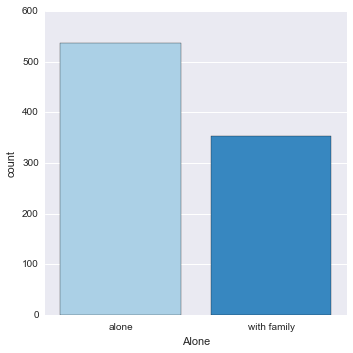

In [31]:
sns.factorplot('Alone',data=titanic,palette='Blues')

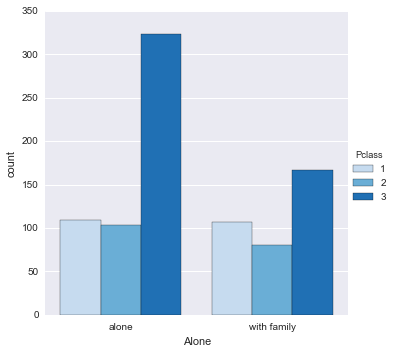

In [38]:
sns.factorplot('Alone',data=titanic,palette='Blues',hue='Pclass')

### 5. What factors helped people survive the titanic?

In [43]:
# make new column
# map a dictionary onto values of Survivor

surv = {0:'no',1:'yes'}

titanic['Survivor'] = titanic['Survived'].map(surv)

In [47]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S,with family,no


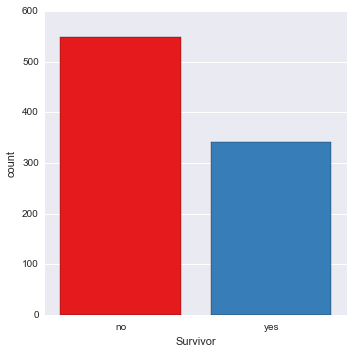

In [46]:
sns.factorplot('Survivor',data=titanic,palette='Set1')

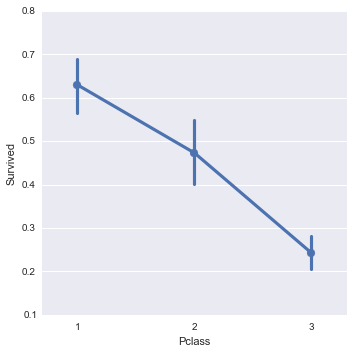

In [53]:
# was class a factor in survival?

sns.factorplot('Pclass','Survived',data=titanic)

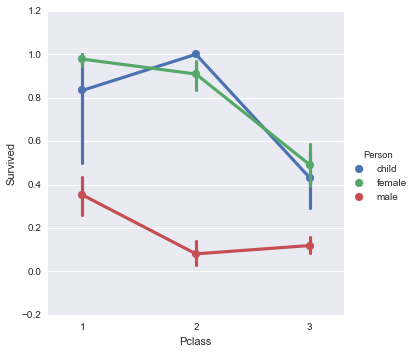

In [58]:
# being a male or 3rd class was not good for survival

sns.factorplot('Pclass','Survived',data=titanic,hue='Person')

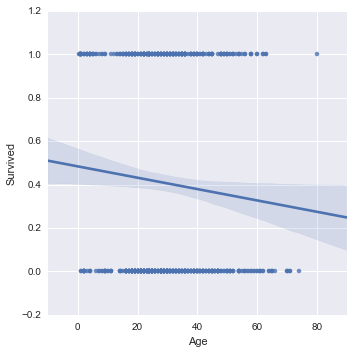

In [59]:
# is age a factor on survival?
# top line is people who survived
# bottom line is people who did not survive
# trend: older -> less likely to survive

sns.lmplot('Age','Survived',data=titanic)

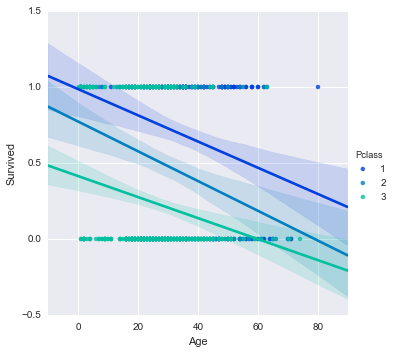

In [61]:
# add class to the graph

sns.lmplot('Age','Survived',data=titanic,hue='Pclass',
          palette='winter')

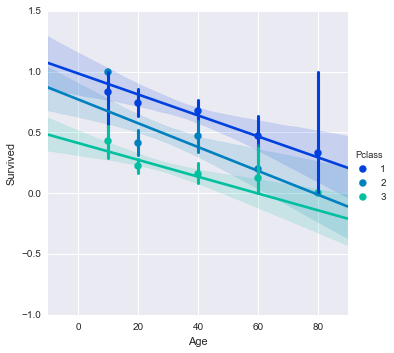

In [63]:
# make a bins list to overlap with age points
# many older people in 1st class survived

generations = [10,20,40,60,80]

sns.lmplot('Age','Survived',hue='Pclass',data=titanic,
palette='winter',x_bins=generations)

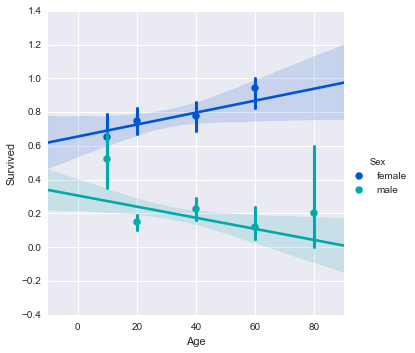

In [64]:
# older females had better chances of surviving than males

sns.lmplot('Age','Survived',hue='Sex',data=titanic,
palette='winter',x_bins=generations)

### 6. Did the deck have an effect on the passengers survival rate? Did this answer match with your intutition?

In [39]:
titanic['Deck'] = titanic['Cabin'].str[:1]

In [40]:
df = titanic[['Survived','Deck']]

In [46]:
df.dropna(inplace=True)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [47]:
df.head()

,Survived,Deck
1,1,C
3,1,C
6,0,E
10,1,G
11,1,C


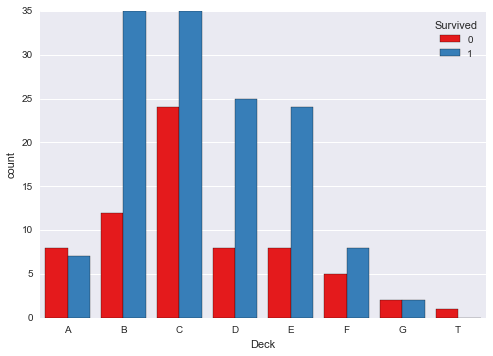

In [51]:
sns.barplot('Deck',data=df,hue='Survived',palette='Set1')

### 7. Did having a family member increase the odds of surviving the crash?

In [6]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S,male,with family


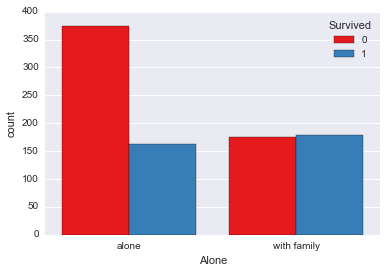

In [14]:
sns.barplot('Alone',data=titanic,hue='Survived',palette='Set1',dropna=True)